In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("review-data/IMDB-Dataset.csv")

In [3]:
df["review"][49997]

'I am a Catholic taught in parochial elementary schools by nuns, taught by Jesuit priests in high school & college. I am still a practicing Catholic but would not be considered a "good Catholic" in the church\'s eyes because I don\'t believe certain things or act certain ways just because the church tells me to.<br /><br />So back to the movie...its bad because two people are killed by this nun who is supposed to be a satire as the embodiment of a female religious figurehead. There is no comedy in that and the satire is not done well by the over acting of Diane Keaton. I never saw the play but if it was very different from this movies then it may be good.<br /><br />At first I thought the gun might be a fake and the first shooting all a plan by the female lead of the four former students as an attempt to demonstrate Sister Mary\'s emotional and intellectual bigotry of faith. But it turns out the bullets were real and the story has tragedy...the tragedy of loss of life (besides the two 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [7]:
import re
from bs4 import BeautifulSoup
# nltk
import nltk #a natural language processing toolkit module associated in anaconda
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,SnowballStemmer
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('omw-1.4')
# sklearn


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Иван\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Иван\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Иван\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Иван\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Удаление ненужных символов из текстов review

In [8]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt


df['review'] = np.vectorize(remove_pattern)(df['review'], "@[\w]*")

In [9]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()


# Изменение кодировки текста
def to_unicode(text):
    if isinstance(text, float) or isinstance(text, int):
        text = str(text)
    if not isinstance(text, str):
        text = text.decode('utf-8', 'ignore')
    return text


# Удаление эмодзи
def deleteEmoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)


# Удаление спецсимволов и квадратных скобок из текста
def remove_specchars_brackets_spaces(text):
    text = re.sub('\[[^]]*\]', ' ', text)
    text = re.sub(r'[^a-zA-z0-9\s]',' ',text)
    while "  " in text:
        text = re.sub('  ', ' ', text)
    return text


# Удаление "шумов" в текста
def delete_noise_text(text):
    text = to_unicode(text)
    soup = BeautifulSoup(text, "html.parser")
    text = strip_html(text)
    text = re.sub(r"http\S+", " ", text)
    text = deleteEmoji(text)
    text = text.encode('ascii', 'ignore')
    text = to_unicode(text)
    text = remove_specchars_brackets_spaces(text)
    text = text.lower() # замена больших букв на маленькие
    return text


In [10]:
df.loc[0]['review']

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [11]:
df['review'] = df['review'].apply(delete_noise_text)
df.loc[0]['review']

C:\Users\3C8A~1\AppData\Local\Temp/ipykernel_2572/1363529809.py:38: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
C:\Users\3C8A~1\AppData\Local\Temp/ipykernel_2572/1363529809.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


'one of the other reviewers has mentioned that after watching just 1 oz episode you ll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to many aryans muslims gangstas latinos christians italians irish and more so scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wouldn t dare forget pretty

### Удаление стоп-слов

In [12]:
# Токенизация текста
tokenizer = ToktokTokenizer()

# Беру стоп-слова из английского языка
stopword_list = nltk.corpus.stopwords.words('english')

In [13]:
stop = set(stopwords.words('english'))
print("стоп-слова английского языка: ", stop)

# Удаление стоп-слов
def remove_stopwords(text):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

df['review'] = df['review'].apply(remove_stopwords)

стоп-слова английского языка:  {"she's", 'before', 'why', 'didn', 'until', "aren't", 'only', 'have', "hasn't", 'against', 'we', "couldn't", 'an', 'wouldn', 'too', "shouldn't", 'that', 'on', 'other', 'same', 'them', 'by', 'there', 'with', 'very', 'ours', 'such', 'themselves', 'has', 'your', 'under', 'ain', 'about', 're', 'm', 'll', 'can', 'hadn', 'and', 'y', 's', "isn't", 'they', 'won', 'did', 'having', 'shan', 'over', "should've", 'if', 'where', 'then', 'nor', 'up', 'after', "shan't", 'yourself', 'some', 'him', 'd', "wouldn't", 'couldn', 'out', 'mightn', 'once', "you'd", 'between', 'shouldn', 'most', 'what', "it's", 'theirs', 'during', 'down', 'ma', 'being', "didn't", "mustn't", 'needn', 'he', "mightn't", 'which', 'ourselves', 'how', 'no', "doesn't", 'their', 'few', 'of', 'his', 'who', 'does', 'both', 'to', 'weren', 'don', 'should', 'but', 'wasn', 'haven', 'were', 'her', 've', 'myself', 'at', 'further', 'than', 'our', 'through', 'in', "weren't", 'for', 'is', 'hasn', 'me', 'doesn', 'its

### Вычленение корня и лемматизация

In [14]:
def simple_stemmer(text):
    ps = SnowballStemmer(language='english')
    return ' '.join([ps.stem(word) for word in tokenizer.tokenize(text)])


def lemmatize_all(sentence):
    wnl = WordNetLemmatizer()
    for word, tag in pos_tag(word_tokenize(sentence)):
        if tag.startswith("NN"):
            yield wnl.lemmatize(word, pos='n')
        elif tag.startswith('VB'):
            yield wnl.lemmatize(word, pos='v')
        elif tag.startswith('JJ'):
            yield wnl.lemmatize(word, pos='a')
        else:
            yield word


def lemmatize_text(text):
    return ' '.join(lemmatize_all(text))

In [19]:
df['review'][0]

'one reviewers mentioned watching 1 oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street ski

In [18]:
df['review'].apply(simple_stemmer)[0]

'one review mention watch 1 oz episod hook right exact happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus main emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker side'

In [21]:
df['review'].apply(lemmatize_text)[0]

'one reviewer mention watch 1 oz episode hook right exactly happen first thing strike oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangstas latinos christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show dare forget pretty picture paint mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watch developed taste oz get accustomed high level graphic violence violence injustice crook guard sell nickel inmate kill order get away well mannered middle class inmate turn prison bitch due lack street skill prison experience watch oz may become comfortab

In [45]:
df['review'] = df['review'].apply(simple_stemmer)
df['review'] = df['review'].apply(lemmatize_text)


<AxesSubplot:>

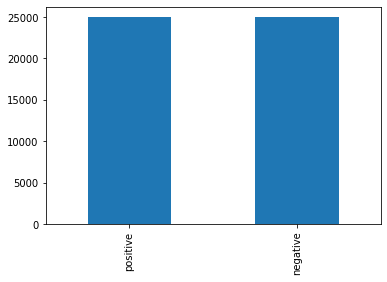

In [46]:
df.sentiment.value_counts().plot(kind = 'bar')

In [49]:
df.to_csv("processed_review.csv", index=False)

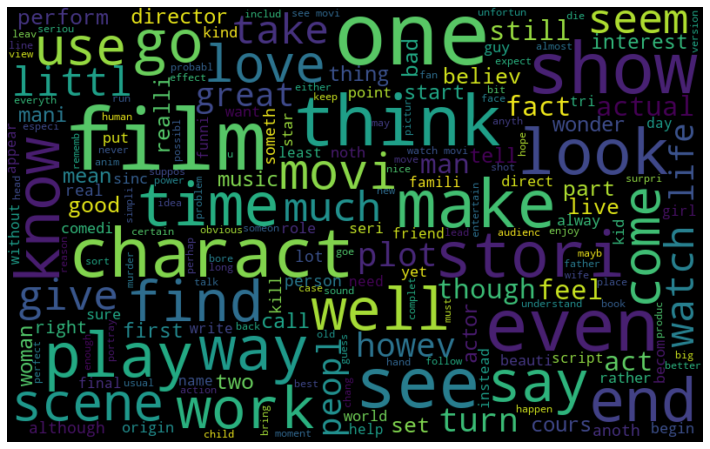

In [52]:
all_words = " ".join([sentence for sentence in df['review']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

'cathol teach parochi elementari school nun teach jesuit priest high school colleg still practic cathol would consid good cathol church eye believ certain thing act certain way church tell back movi bad two peopl kill nun suppos satir embodi femal religi figurehead comedi satir do well act dian keaton never saw play differ movi may good first think gun might fake first shoot plan femal lead four former student attempt demonstr sister mari emot intellectu bigotri faith turn bullet real stori tragedi tragedi loss life besid two former student live abort babi life student mom tragedi dogmat author love peopl tragedi organ religion replac true faith god wrong today islam yesterday judaism christian'